In [1]:
import os
import glob
import subprocess
from concurrent.futures import ThreadPoolExecutor
from multiprocessing import freeze_support
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
!rm ./out/*

In [3]:
cur_dir = %pwd

In [4]:
in_files = glob.glob(os.path.join(cur_dir, 'in', '*.txt'))
test_cases = [os.path.basename(f) for f in in_files]   

In [5]:
df = pd.read_csv("test_res.csv", index_col=0)
d = {}

In [33]:
def exec(in_file: str):
    out_file = os.path.join(cur_dir, 'out', os.path.basename(in_file))
    res = subprocess.run(f"./main < {in_file} > {out_file}", shell=True, stderr=subprocess.PIPE)
    s = res.stderr.decode('utf-8').strip().split('\n')[-1].strip()
    test_case = os.path.basename(in_file)
    d[test_case] = int(s)

In [34]:
freeze_support()
with ThreadPoolExecutor(max_workers=50) as executor:
    executor.map(exec, in_files)

cur_time = datetime.datetime.now().isoformat()
df[cur_time] = d

In [35]:
df = df.sort_index()

In [48]:
df.describe()

,2023-12-23T10:53:24.424343
count,1.000000e+03
mean,9.740481e+04
std,4.027713e+05
min,1.150000e+02
25%,7.657000e+03
50%,1.815250e+04
75%,4.732825e+04
max,7.374017e+06


<AxesSubplot: >

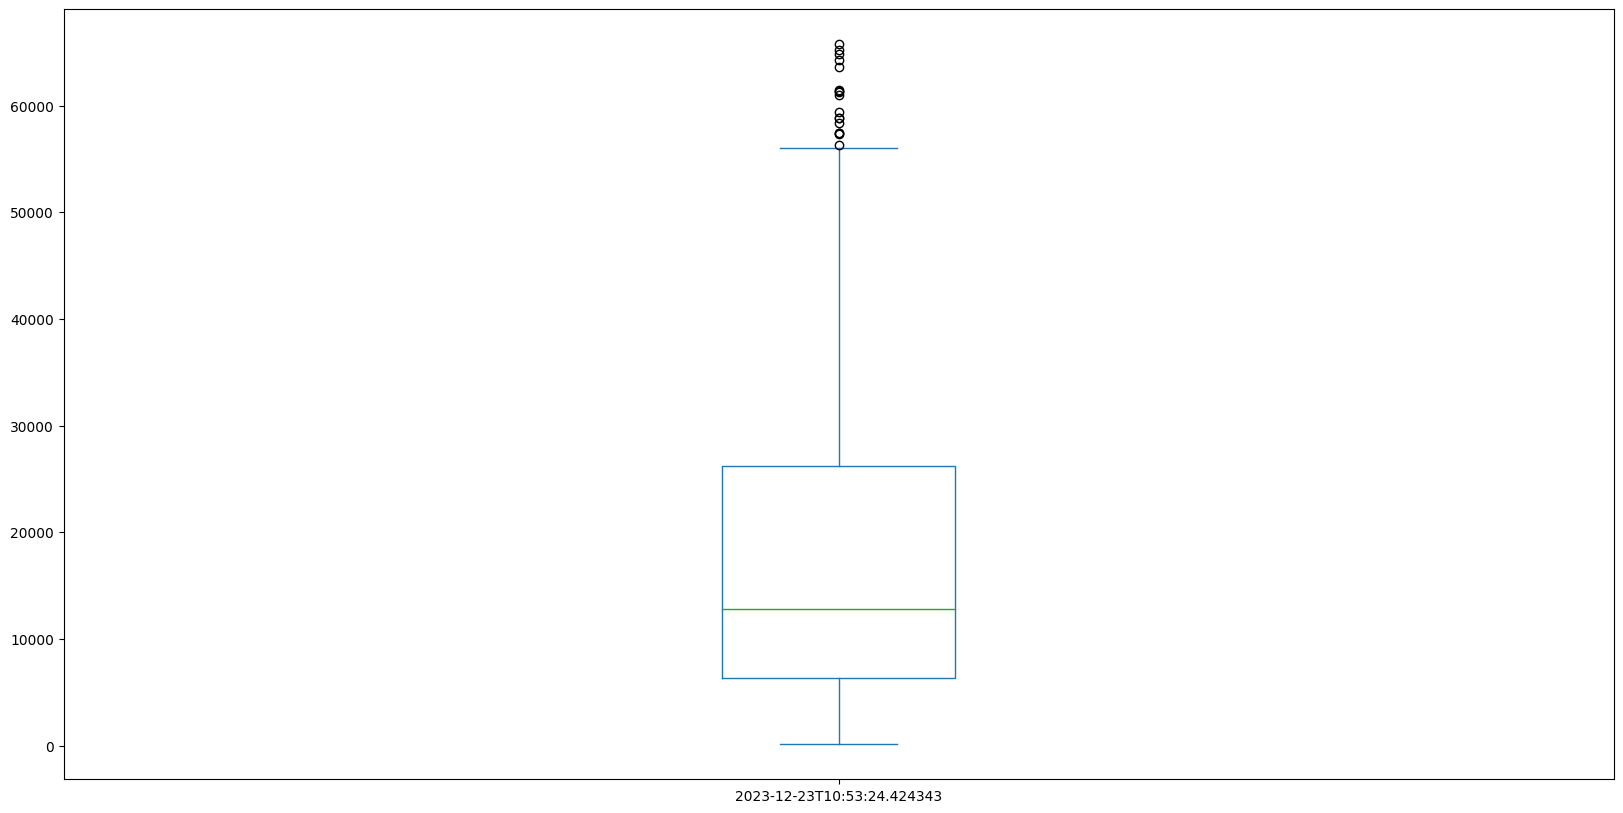

In [55]:
df[df<df.quantile(0.8)].plot(kind='box', figsize=(20, 10))

In [49]:
df.to_csv("test_res.csv")